In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

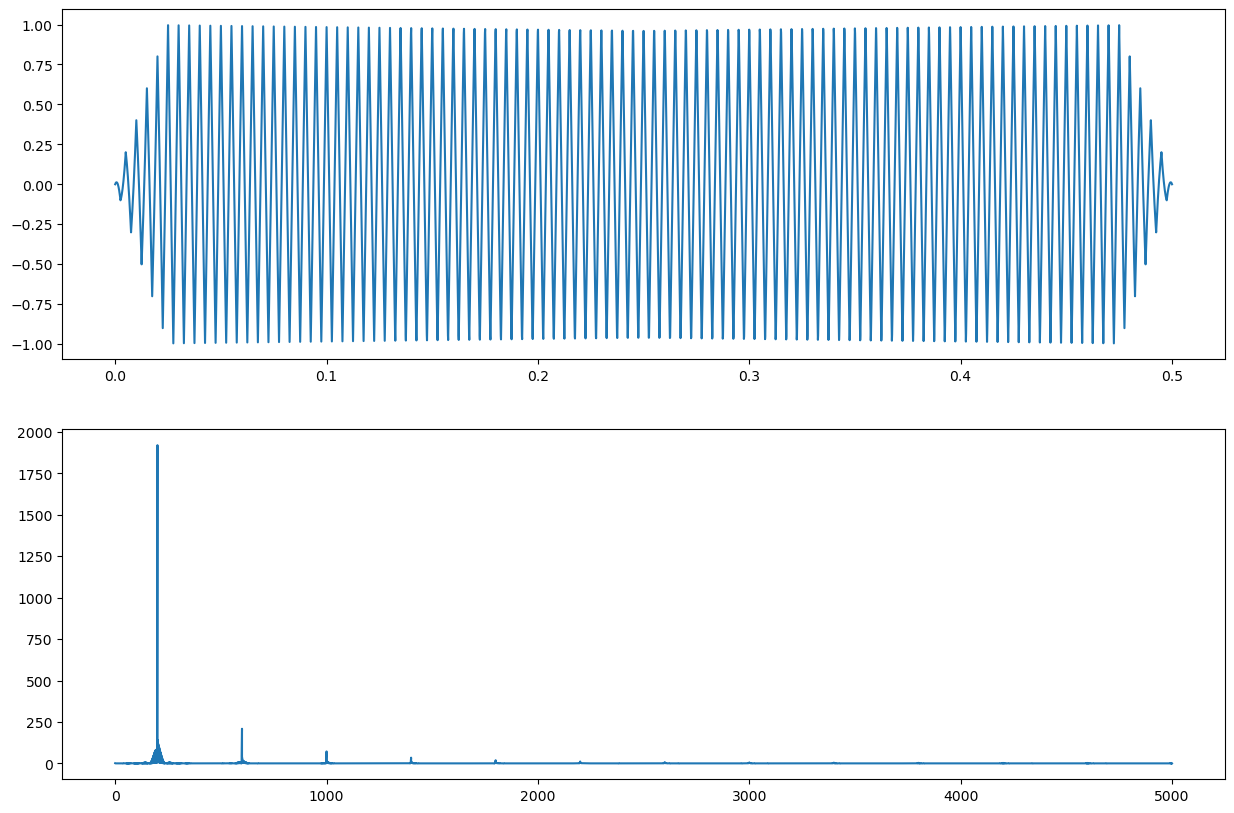

In [27]:
class Sinusoid:
    def __init__(self, freq=440, amp=1, framerate = 44000, offset=0):
        self.freq = freq
        self.amp = amp
        self.framerate = framerate
        self.offset = offset
        self.ys = []
        self.ts = []

    def normalize(self):
        self.ys = self.ys - self.ys.mean()
        high = abs(max(self.ys))
        low = abs(min(self.ys))
        self.ys = self.amp*self.ys/max(high,low)

    def apodize(self, denom=20,duration=0.1):
        n = len(self.ys)
        k1 = n//denom
        k2 = int(duration*self.framerate)
        k = min(k1,k2)
        w1 = np.linspace(0,1,k)
        w2 = np.ones(n-2*k)
        w3 = np.linspace(1,0,k)
        window = np.concatenate((w1,w2,w3))
        self.ys = self.ys*window

    def get_fft(self):
        hs = fftpack.rfft(self.ys)
        fs = fftpack.rfftfreq(len(self.ys), 1/self.framerate)
        amps = np.absolute(hs)
        return fs,amps
        
class TriangleSignal(Sinusoid):
    def evaluate(self, ts):
        self.ts = ts
        cycles = self.freq * self.ts + self.offset/(2*np.pi)
        frac, _ = np.modf(cycles)
        self.ys = np.abs(frac - 0.5)
        return self

framerate = 10000
tri_signal = TriangleSignal(freq=200, framerate=framerate)
start_time = 0
end_time = 0.5
x_axis = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
tri_signal = tri_signal.evaluate(x_axis)
tri_signal.normalize()
tri_signal.apodize()
fs, amps = tri_signal.get_fft()
fig, ax = plt.subplots(2,1)
fig.set_size_inches(15,10)
ax[0].plot(tri_signal.ts, tri_signal.ys)
ax[1].plot(fs,amps)

array([0.000e+00, 2.000e-08, 2.000e-08, ..., 4.998e-05, 4.998e-05,
       5.000e-05])